In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [413]:
# Load in the data
data16 = pd.read_csv('final16.csv', index_col=[0])
data18 = pd.read_csv('final18.csv', index_col=[0])

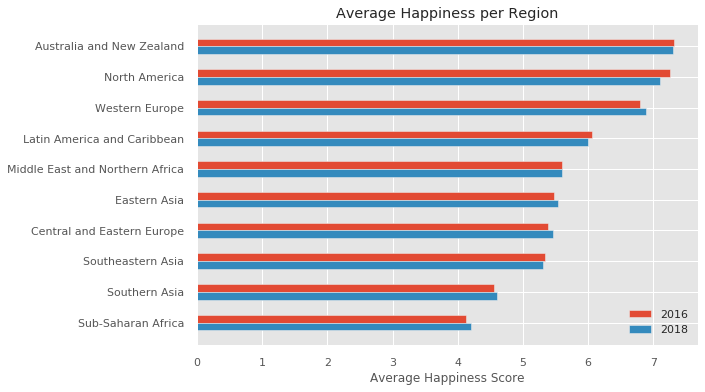

In [414]:
# Analysing average Happiness by different region and comparing the years

def RegionData(reg):
    regData = reg[['Region', 'Happiness Score']]
    regData = regData.groupby(
        ['Region']).mean().reset_index().sort_values(by=['Happiness Score'], ascending=False)
    return regData

regData = pd.merge(RegionData(data16), RegionData(data18), on=['Region'], how='inner')
regData.columns = ['Region', '2016', '2018']

plt.style.use("ggplot")

x_index = np.arange(len(regData['Region']))
width = 0.25

happy16_y = regData['2016']
plt.barh(x_index-width/2, happy16_y, height=width, label='2016')

happy18_y = regData['2018']
plt.barh(x_index+width/2, happy18_y, height=width, label='2018')

plt.yticks(ticks=x_index, labels=regData['Region'])
plt.legend()
plt.title('Average Happiness per Region')
plt.xlabel('Average Happiness Score')
plt.gca().invert_yaxis()
#plt.show()


In [415]:
# Analysing average Happiness scale worldwide
data = [ dict(
 type='choropleth',
 locations = data18['Country'],
 autocolorscale = True,
 z = data18['Happiness Score'],
 locationmode = 'country names',
 marker = dict(line = dict (color='rgb(217,230,29)', width=2)),
 colorbar = dict(title = 'Happiness'))]
layout = dict(title = 'Top Countries by Happiness for 2018')
fig = go.Figure(data = data, layout = layout)
#fig.show()

[(2, 8)]

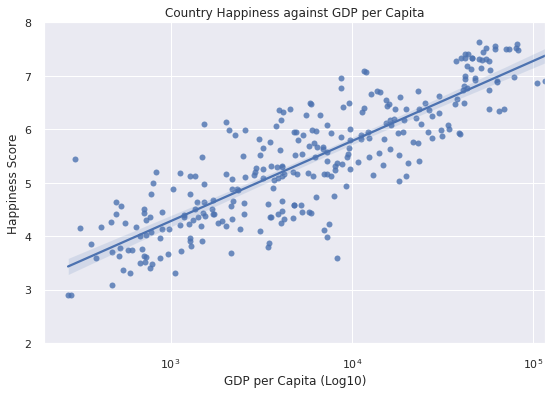

In [416]:
gdpData = data16.append(data18).reindex()
sns.set(color_codes=True)
gdpGraph = sns.regplot(x="GDP per Capita", y="Happiness Score", data=gdpData, logx=True)
gdpGraph.set(xscale="log")
gdpGraph.set_xlabel('GDP per Capita (Log10)')
gdpGraph.set_title('Country Happiness against GDP per Capita')
gdpGraph.set(ylim=(2, 8))

In [421]:

def Normalise(df):
    for col in df.columns:
            if df[f'{col}'].dtype != 'object':
                df[f'{col}'] = stats.boxcox(df[f'{col}'])[0]

Normalise(data16)

def QQPlot(df):
    for col in df.columns:
        if df[f'{col}'].dtype != 'object':
            sm.qqplot(df[f'{col}'], line='s', label=f'{col}')
            pylab.legend()
            pylab.show()

#QQPlot(data16)


ValueError: Data must be positive.

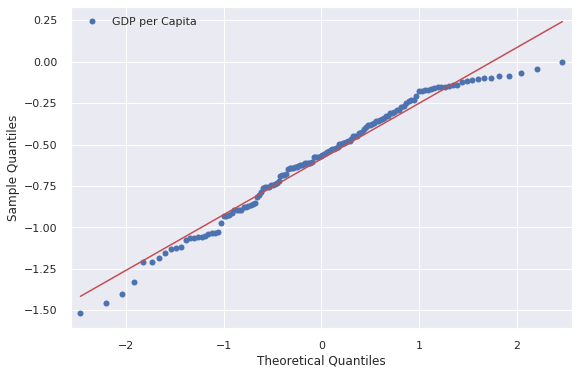

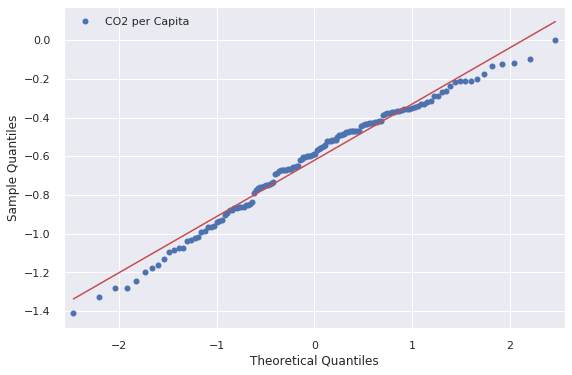

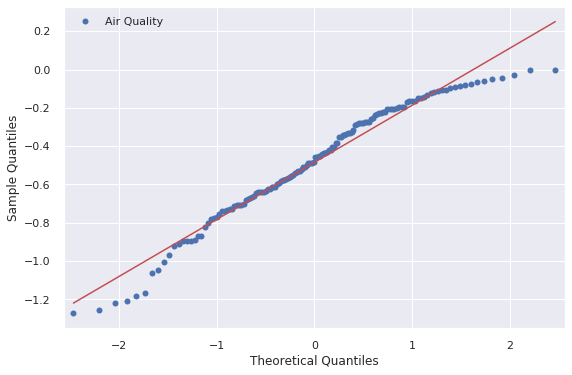

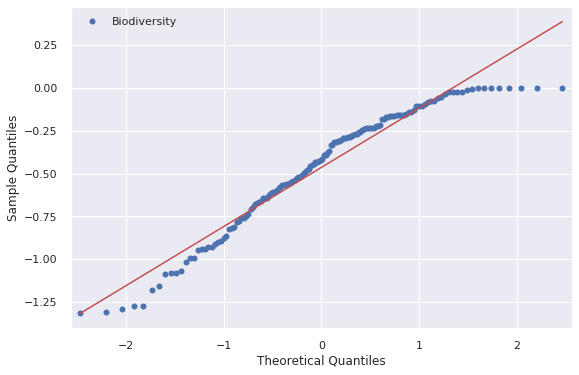

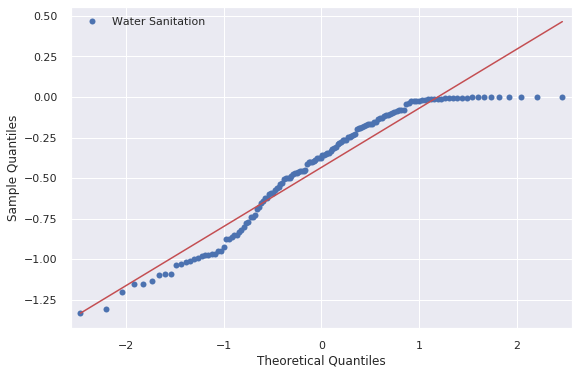

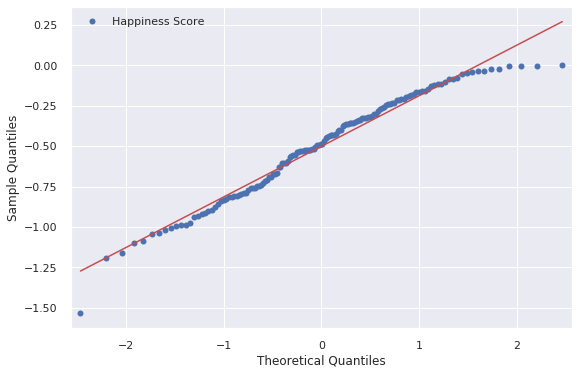

In [418]:
scaler = MinMaxScaler()
def MinMax(df):
    for col in df.columns:
        if df[f'{col}'].dtype != 'object':
            df[[f'{col}']] = scaler.fit_transform(df[[f'{col}']])

MinMax(data16)



QQPlot(data16)

[Text(0.5, 0, 'GDP per Capita'),
 Text(1.5, 0, 'CO2 per Capita'),
 Text(2.5, 0, 'Air Quality'),
 Text(3.5, 0, 'Biodiversity'),
 Text(4.5, 0, 'Water Sanitation'),
 Text(5.5, 0, 'Happiness Score')]

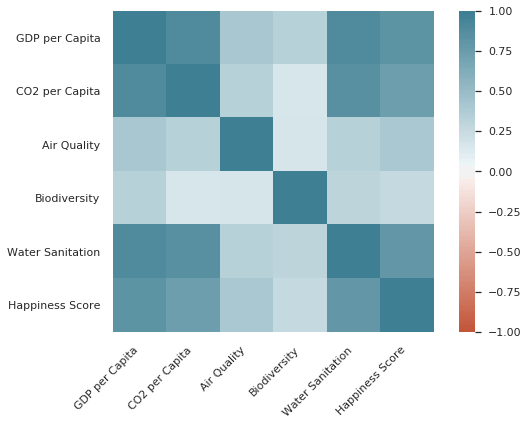

In [419]:
cor = data16.corr()
heatmap16 = sns.heatmap(cor, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
heatmap16.set_xticklabels(heatmapAll.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0.5, 0, 'GDP per Capita'),
 Text(1.5, 0, 'CO2 per Capita'),
 Text(2.5, 0, 'Air Quality'),
 Text(3.5, 0, 'Biodiversity'),
 Text(4.5, 0, 'Water Sanitation'),
 Text(5.5, 0, 'Happiness Score')]

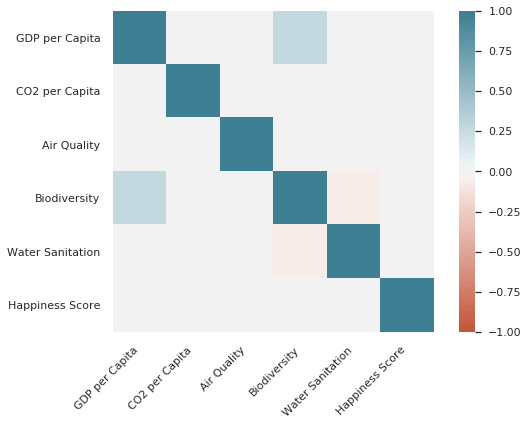

In [420]:

diffData = data18[['GDP per Capita', 'CO2 per Capita', 'Air Quality', 'Biodiversity', 'Water Sanitation', 'Happiness Score']].div(data16[['GDP per Capita', 'CO2 per Capita', 'Air Quality', 'Biodiversity', 'Water Sanitation', 'Happiness Score']])
diffCor = diffData.corr()
diffHeatMap = sns.heatmap(diffCor, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
diffHeatMap.set_xticklabels(diffHeatMap.get_xticklabels(), rotation=45, horizontalalignment='right')
